## Inverse Kinematics for a Rotary Stewart Platform

This page will show you how, given the (diagonal) inertia tensor and mass for your loaded motion platform, the accelerations and rotations you requested for your platform to undergo, and the directions of the connecting rods between the platform and the motor (solved in another notebook), you can obtain the forces in each connecting rod, and eventually the torques needed in each of the 6 motors. This is imperative when designing your platform so that you choose motors that can perform appropriately.

### Newton's Laws

We will be using Newton's 2nd law to solve the inverse kinematics problem. There are 6 connecting rods attached to the motion base. 

$$ \sum{\vec{F_i}} = m\vec{a}$$

This vector equation can be broken down into three components.

$$\sum{F_i \hat{e}_i \cdot \hat{\imath}} = m\ddot{x}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{\jmath}} = m\ddot{y}$$

$$ \sum{F_i \hat{e}_i \cdot \hat{k}} = m\ddot{z}$$

We can also write an equation for the moment balance on the platform, taken about the center of mass of the platform. We will denote by $\vec{r}_{i/g}$ the vector connecting the platform's center of mass to each force application point. We can then write the 6 moments caused by each of the 6 connecting rod forces (connecting rods are two-force members) as:

$$\sum \vec{r}_{i/g} \times  \left( F_i \hat{e}_i \right) = {J}\vec{\ddot{\theta}}  $$



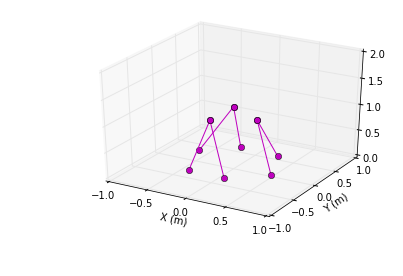

In [5]:
%matplotlib inline
from motionbasefunctions import *

platform_z0 = 1#meters, the resting height of the base.

baseradius = .5 #meters, the radius of the base
motorarm = 0.2 #meters, length of the motor arm
conrod = sqrt(platform_z0**2+motorarm**2)-.05 #meters, length of the connecting rod
platform_radius = .3#meters, the radius of the platform

#these are the yaw angles at which each motor sits.
motor_yaws = arange(0,6)*pi/3-pi/6

#calculate the positions of the motor shafts. X forward, Y left, Z up.
motor_X = baseradius*cos(motor_yaws)
motor_Y = baseradius*sin(motor_yaws)
motor_Z = zeros(6)

fig = figure()
ax = fig.add_subplot(111, projection='3d')


#get our position command for the platform
x,y,z,roll,pitch,yaw = 0,0,0,0,0,0
#calculate the positions of the platform points P, one for each motor.
PX,PY,PZ = calculate_P(x,y,z,roll,pitch,yaw)
#calculate the relative position of the points P with respect to the points O
rpox,rpoy,rpoz = findrpo(x,y,z,roll,pitch,yaw)
#use the algorithm to find our motor angles
motor_thetas = findthetam(x,y,z,roll,pitch,yaw,0.01)
#pull off the global locations for Q
qx,qy,qz = calcQ(motor_thetas)
#plot the platform:
plotplatform(PX,PY,PZ)
plotbase()
plotlegs(rpox,rpoy,rpoz)
plotmotorarms(qx,qy,qz)
plotconrods(qx,qy,qz,rpox+motor_X,rpoy+motor_Y,rpoz+motor_Z)
xlabel('X (m)')
ylabel('Y (m)')
ax.set_xlim3d(-2*baseradius, 2*baseradius)
ax.set_ylim3d(-2*baseradius,2*baseradius)
ax.set_zlim3d(0,4*baseradius)

show()